In [20]:
from igraph import Graph
from igraph import plot
import igraph
import numpy as np

In [21]:
#carregando de grafo no formato graphml
grafo = igraph.load('Grafo.graphml')
print(grafo)

IGRAPH D-W- 53 179 --
+ attr: Handicapped (v), Lokationposition1highest53lowest (v), Repeater (v),
  Sweetsgiver (v), b (v), g (v), id (v), label (v), r (v), size (v), x (v), y
  (v), Edge Label (e), id (e), weight (e)
+ edges:
 0 ->  3  4 36                              29 ->  0 13 45 49
 1 -> 14 24 50                              30 -> 13 14 23 29 40
 2 ->  1  3  8 15 35                        31 -> 35
 3 ->  9 13 22 35 45 48                     32 -> 21 26
 4 ->  0  5 13 23                           33 ->
 5 ->  1  3  4 13                           34 ->  4
 6 -> 10 15                                 35 ->  6 10 22 23 28 31 44 46 49
 7 ->                                       36 -> 10 49
 8 -> 40 49                                 37 ->  0  2 10 14 16 17 22 24 35
38 40 48
 9 ->  3                                    38 -> 22 32 36
10 ->  6  8 13 14 27                        39 ->
11 -> 43                                    40 ->  8 12 20 23 50
12 -> 40                                

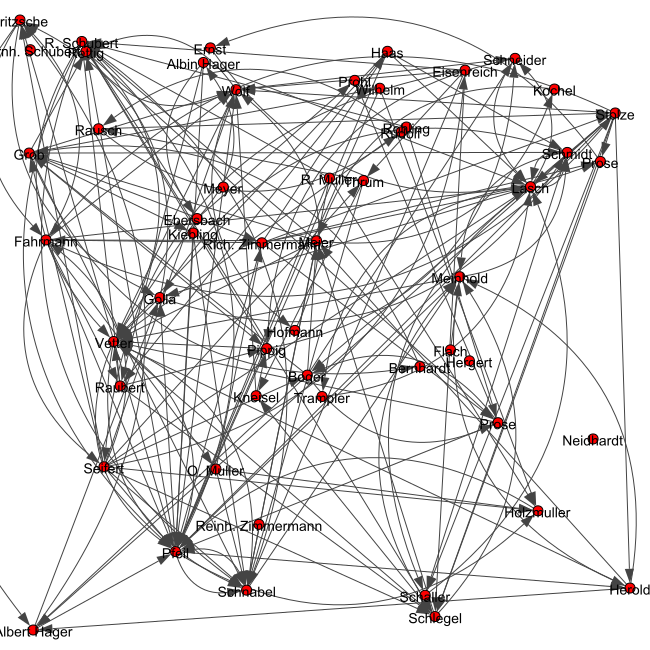

In [22]:
#visualizazção do gráfico
plot(grafo, bbox=(0,0,650,650))

In [23]:
#visualizaçõ das comunidades
comunidades=grafo.clusters()
print(comunidades)

Clustering with 53 elements and 11 clusters
[ 0] 51, 52
[ 1] 47
[ 2] 42
[ 3] 39
[ 4] 34
[ 5] 33
[ 6] 25
[ 7] 19
[ 8] 7
[ 9] 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22,
     23, 24, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 40, 41, 43, 44, 45,
     46, 48, 49, 50
[10] 18


In [24]:
#em qual comunidade cada registro foi adicionado
comunidades.membership

[9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 7,
 9,
 9,
 9,
 9,
 9,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 5,
 4,
 9,
 9,
 9,
 9,
 3,
 9,
 9,
 2,
 9,
 9,
 9,
 9,
 1,
 9,
 9,
 9,
 0,
 0]

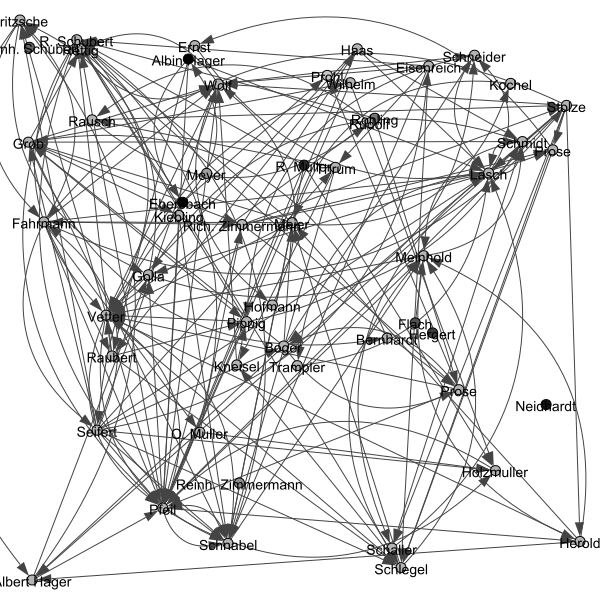

In [25]:
#visualização de grado
cores=comunidades.membership
#array de cores para definir cores diferentes para cada grupo
cores = np.array(cores)
cores= cores*20
cores= cores.tolist()
plot(grafo, vertex_color= cores)

EXEMPLO 2

In [26]:
grafo2= Graph(edges= [(0,2), (0,1), (1,4),(1,5), (2,3), (6,7), (3,7), (4,7), (5,6)], directed= True)
grafo2.vs['label'] = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
grafo2.es['weight'] = [2,1,2,1,2,1,3,1]

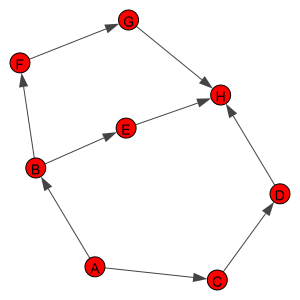

In [28]:
plot(grafo2, bbox=(0,0,300,300))

In [29]:
#comunidade e em qual cada elemnto foi associado
comunidades2 = grafo2.clusters()
print(comunidades2)
comunidades2.membership

Clustering with 8 elements and 8 clusters
[0] 0
[1] 2
[2] 3
[3] 1
[4] 5
[5] 6
[6] 4
[7] 7


[0, 3, 1, 2, 6, 4, 5, 7]

In [30]:
#função mais otimizada oara vidualização das comunidades
c= grafo2.community_edge_betweenness()
print(c)
#obtenção do número de clasters
c.optimal_count
#visualização de nova comunidade
comunidades3 = c.as_clustering()
print(comunidades3)
comunidades3.membership

Dendrogram, 8 elements, 7 merges

7 4 3 6 5 1 2 0
| | | | | | | |
`-' | | | | | |
 |  | | | | | |
 `--' | | | | |
  |   | | | | |
  `---' `-' `-'
    |    |   | 
    `----'   | 
      |      | 
      `------'
Clustering with 8 elements and 3 clusters
[0] 0, 2
[1] 1, 5
[2] 3, 4, 6, 7


[0, 1, 0, 2, 2, 1, 2, 2]

In [31]:
#geração do grafo das comunidades colocando cores entre os grupos identificados
plot(grafo2, vertex_color= comunidades3.membership)
cores= comunidades3.membership
#array para definir coresdiferentes para cada grupo
cores = np.array(cores)
cores= cores*100
cores= cores.tolist()

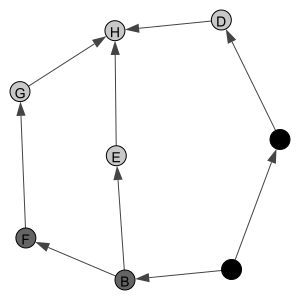

In [33]:
plot(grafo2, bbox=(0,0,300,300), vertex_color = cores)

In [36]:
#visualização dos cliques
cli = grafo.as_undirected().cliques(min= 4)
print(cli)
len(cli)

[(0, 3, 13, 45), (13, 14, 45, 49), (21, 40, 44, 48), (14, 21, 44, 48), (13, 29, 45, 49), (0, 13, 29, 45), (1, 14, 24, 50), (14, 24, 37, 48), (17, 22, 37, 38), (3, 13, 22, 45), (4, 13, 14, 22), (14, 22, 42, 45), (13, 14, 22, 45), (10, 14, 37, 48), (10, 14, 21, 48), (4, 5, 13, 14), (1, 5, 14, 21)]


17